# Import Libraries

In [1]:
import requests
import pandas as pd
import io
import numpy as np
import time
import json
import tweepy
import timeit
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import datetime

# Gather

## Gathering data source 1 

### twitter_archive dataset

Import manually downloaded We Rate Dogs Twitter Archive

In [2]:
wrd_archive = pd.read_csv("./data/twitter-archive-enhanced.csv") 

In [3]:
wrd_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
wrd_archive.T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000,2017-07-29 00:08:17 +0000,2017-07-28 16:27:12 +0000,2017-07-28 00:22:40 +0000,2017-07-27 16:25:51 +0000,2017-07-26 15:59:51 +0000,...,2015-11-16 01:01:59 +0000,2015-11-16 00:55:59 +0000,2015-11-16 00:49:46 +0000,2015-11-16 00:35:11 +0000,2015-11-16 00:30:50 +0000,2015-11-16 00:24:50 +0000,2015-11-16 00:04:52 +0000,2015-11-15 23:21:54 +0000,2015-11-15 23:05:30 +0000,2015-11-15 22:32:08 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891087950...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...

## Gather data source 2

### image_prediction_dataset

Programatically import image predictions 

In [5]:
url_data_image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
dog_breed_predictions = pd.read_csv(io.StringIO(url_data_image_predictions.decode('utf-8')),sep="\t")

In [6]:
dog_breed_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
dog_breed_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Gather data source 3

### tweets_statuses_dataset  

By Twitter API import Archived Tweets Statuses from Twitter

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# create bins  by 100 in wrd_archive in order to be able query them by 100 from twitter  
tweet_ids = wrd_archive[['tweet_id']]
id_list = tweet_ids.tweet_id.tolist()
tweet_ids['bins'] = np.arange(len(tweet_ids.index)) // 100
id_list_bucket_max = (len(tweet_ids.index) // 100 ) + 1

In [10]:
elapsedtime = 0
tweet_txt = []
for i in range(id_list_bucket_max):
    start = time.time()
    try:
        tweets = api.statuses_lookup(tweet_ids.loc[tweet_ids["bins"] == i, ["tweet_id"]]['tweet_id'].tolist(), tweet_mode='extended')
    except:
        print("tweepy except error. total elapsed time",elapsedtime)
        continue
    end = time.time()
    elapsedtime += end - start
    for i in tweets:
        tweet_txt.append(i._json)

with open('./data/tweet_json.txt', 'w') as outfile: 
    for tweet_bins in tweet_txt:
         json.dump(tweet_bins, outfile)
         outfile.write('\n')

In [11]:
#create a panda dataframe from tweet_json file
wrd_tweets_statuses = pd.read_json('./data/tweet_json.txt', lines=True)

In [12]:
wrd_tweets_statuses.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-06-18 16:57:37,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876484043352588288, 'id_str'...",18401,False,This is Benedict. He wants to thank you for th...,NaN,...,NaN,NaN,NaN,NaN,2351,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-07-15 23:25:31,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 886366138128449536, 'id_str'...",20749,False,This is Roscoe. Another pupper fallen victim t...,NaN,...,NaN,NaN,NaN,NaN,3120,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,79,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-20 16:49:33,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 888078426338406400, 'id_str'...",21291,False,This is Gerald. He was just told he didn't get...,NaN,...,NaN,NaN,NaN,NaN,3402,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41260,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8421,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
wrd_tweets_statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 31 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   2340 non-null datetime64[ns]
display_text_range           2340 non-null object
entities                     2340 non-null object
extended_entities            2067 non-null object
favorite_count               2340 non-null int64
favorited                    2340 non-null bool
full_text                    2340 non-null object
geo                          0 non-null float64
id                           2340 non-null int64
id_str                       2340 non-null int64
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null float64
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null float64
is_quote_status              2340 non-null bool
lang

In [14]:
wrd_tweets = wrd_tweets_statuses[['id', 'retweet_count', 'favorite_count']]
wrd_tweets.head()

,id,retweet_count,favorite_count
0,876484053909872640,2351,18401
1,886366144734445568,3120,20749
2,877611172832227328,79,0
3,888078434458587136,3402,21291
4,891689557279858688,8421,41260


In [15]:
wrd_tweets.to_csv("data/tweet_json.csv")
dog_breed_predictions.to_csv("./data/image_predictions.csv")

In [16]:
#prepare dataframes for cleaning
df_archive = wrd_archive.copy()
df_breeds = dog_breed_predictions.copy()
df_tweets = wrd_tweets.copy()

# Assess

## Visual Assessment

In [17]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
df_breeds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
df_tweets

,id,retweet_count,favorite_count
0,876484053909872640,2351,18401
1,886366144734445568,3120,20749
2,877611172832227328,79,0
3,888078434458587136,3402,21291
4,891689557279858688,8421,41260
5,879492040517615616,3105,22940
6,878604707211726852,7036,29638
7,879674319642796034,10,303
8,884876753390489601,5470,27329
9,882992080364220416,3826,23455


## Programmatic Assessment

In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
df_archive[df_archive.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [25]:
df_archive.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [26]:
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_breeds[df_breeds.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
df_breeds.T

,0,1,2,3,4,5,6,7,8,9,...,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465,666050758794694657,666051853826850816,666055525042405380,666057090499244032,666058600524156928,...,890240255349198849,890609185150312448,890729181411237888,890971913173991426,891087950875897856,891327558926688256,891689557279858688,891815181378084864,892177421306343426,892420643555336193
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
img_num,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,2,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher,Bernese_mountain_dog,box_turtle,chow,shopping_cart,miniature_poodle,...,Pembroke,Irish_terrier,Pomeranian,Appenzeller,Chesapeake_Bay_retriever,basset,paper_towel,Chihuahua,Chihuahua,orange
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311,0.651137,0.933012,0.692517,0.962465,0.201493,...,0.511319,0.487574,0.566142,0.341703,0.425595,0.555712,0.170278,0.716012,0.323581,0.0970486
p1_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,False,True,True,False
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler,English_springer,mud_turtle,Tibetan_mastiff,shopping_basket,komondor,...,Cardigan,Irish_setter,Eskimo_dog,Border_collie,Irish_terrier,English_springer,Labrador_retriever,malamute,Pekinese,bagel
p2_conf,0.156665,0.0741917,0.138584,0.360687,0.243682,0.263788,0.0458854,0.0582794,0.0145938,0.192305,...,0.451038,0.193054,0.178406,0.199287,0.116317,0.22577,0.168086,0.078253,0.0906465,0.0858511
p2_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,False
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman,Greater_Swiss_Mountain_dog,terrapin,fur_coat,golden_retriever,soft-coated_wheaten_terrier,...,Chihuahua,Chesapeake_Bay_retriever,Pembroke,ice_lolly,Indian_elephant,German_short-haired_pointer,spatula,kelpie,papillon,banana


In [29]:
df_breeds.query('p1_dog == True or p2_dog == True or p3_dog == True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [30]:
df_breeds.query('p1_dog == True or p2_dog == True or p3_dog == True').count()

tweet_id    1751
jpg_url     1751
img_num     1751
p1          1751
p1_conf     1751
p1_dog      1751
p2          1751
p2_conf     1751
p2_dog      1751
p3          1751
p3_conf     1751
p3_dog      1751
dtype: int64

In [31]:
df_breeds.query('~(p1_dog == False and p2_dog == False and p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [32]:
df_breeds.query('p1_dog != True and (p2_dog == True or p3_dog == True)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False


In [33]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [34]:
df_tweets[df_tweets.duplicated(keep=False)]

,id,retweet_count,favorite_count


## Issues Found (Quality and Tidiness)


### Quality Issues:

####  twitter_archive dataset
  * Only the original tweets (no retweets) with images.
  * Some fields data type should be converted to their real types such as timestamp
  * Some column values have None instead of NaN
  * Dog stage values can be extracted from the text of tweet.
  * Name values can be extracted from the text of tweet.
  * Some fields are unnecessary such as source and expanded_urls after selecting original tweets without retweets retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id,in_reply_to_user_id. 
  * The numerator and denominator columns have incorrect values. Correct them.
  
#### image_prediction_dataset
  * Some dog breed predictions are in lower case and  some in upper case. Convert all to lower case.
  * if p1_dog == False and p2_dog == False and p3_dog == False) the image is not a dog. Therefore only keep the dog images
  * When p1_dog == False, check the p2_dog or p3_dog if they are true, when both are true select the one with higher probability else select the one with the true.
  * Remove img_num which is unnecessary
  * Missing data. There are 2075 tweet ids although we have in twitter archive dataset 2356 tweet ids.
  
  
#### tweets_statuses_dataset  
  * Missing data. There are 2340 tweet ids in this dataset although we have in twitter archive dataset 2356 tweet ids.
  * Rename column name id to tweet_id

### Tidiness Issues:  
 * Merge three datasets
 * Collect dog "stage" (i.e. doggo, floofer, pupper, and puppo) information from 4 different columns to 1 column
 * Collect p1_dog, p2_dog, p3_dog and their probability information in one column
 * Some fields become unnecessary after gathering them in one column such as doggo, floofer, pupper,puppo,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf . Remove them.
 
 

## Clean

### Issue 1: Only the original tweets (no retweets) with images.

In [35]:
# Select tweets without retweets
df_archive = df_archive.query('retweeted_status_id != retweeted_status_id')
# Select tweets with images
df_archive = df_archive.query('expanded_urls==expanded_urls')
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

###  Issue 2: Some fields data type should be converted to their real types such as timestamp

In [36]:
# Convert timestamp to datetime 
df_archive.timestamp = pd.to_datetime(df_archive.timestamp)

### Issue 3: Some column values have None instead of NaN

In [37]:
# Replace None with NaN 
df_archive.replace('None', np.nan, inplace=True)
# Replace Empty values with NaN 
df_archive.replace('', np.nan, inplace=True)
# Check columns with NaN
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2094
in_reply_to_user_id           2094
timestamp                        0
source                           0
text                             0
retweeted_status_id           2117
retweeted_status_user_id      2117
retweeted_status_timestamp    2117
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           622
doggo                         2033
floofer                       2107
pupper                        1885
puppo                         2093
dtype: int64

### Issue 4: Dog stage values can be extracted from the text of tweet.

In [38]:
def find_dog_stage(stage,dataframe):
    dataframe[stage]=dataframe.text.str.lower().str.contains(stage)
    return dataframe

### Issue 5: Name values can be extracted from the text of tweet.

In [39]:
df_archive["name"] = df_archive.text.str.extract("^[\s]*This[\s]*is[\s]*([A-Z][a-z]+)", expand=False)
df_archive.replace('None', np.nan, inplace=True)

In [40]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1073 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(5

### Issue 6: Some fields are unnecessary such as source and expanded_urls after selecting original tweets without retweets retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id,in_reply_to_user_id.

In [41]:
remove_cols = ["source", "expanded_urls", "in_reply_to_status_id", "in_reply_to_user_id", 
                   "retweeted_status_id", "retweeted_status_user_id", 
                    "retweeted_status_timestamp"]
df_archive.drop(columns=remove_cols, inplace=True)

In [42]:
#Test the result
df_archive.T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
timestamp,2017-08-01 16:23:56,2017-08-01 00:17:27,2017-07-31 00:18:03,2017-07-30 15:58:51,2017-07-29 16:00:24,2017-07-29 00:08:17,2017-07-28 16:27:12,2017-07-28 00:22:40,2017-07-27 16:25:51,2017-07-26 15:59:51,...,2015-11-16 01:01:59,2015-11-16 00:55:59,2015-11-16 00:49:46,2015-11-16 00:35:11,2015-11-16 00:30:50,2015-11-16 00:24:50,2015-11-16 00:04:52,2015-11-15 23:21:54,2015-11-15 23:05:30,2015-11-15 22:32:08
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
rating_numerator,13,13,12,13,12,13,13,13,13,14,...,8,9,10,2,10,5,6,9,7,8
rating_denominator,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
name,Phineas,Tilly,Archie,Darla,Franklin,NaN,NaN,NaN,Zoey,Cassie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Test the result
df_archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.117000e+03,2117.000000,2117.000000
mean,7.363263e+17,12.246103,10.501181
std,6.706417e+16,40.275298,7.105845
min,6.660209e+17,0.000000,2.000000
25%,6.766175e+17,10.000000,10.000000
50%,7.094095e+17,11.000000,10.000000
75%,7.873224e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


### Issue 7: The numerator and denominator columns have incorrect values. Correct them. 

In [44]:
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420])

In [45]:
df_archive.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2])

In [46]:
df_archive.rating_denominator = 10
df_archive.query('rating_numerator < 10')["rating_numerator"] = 10
df_archive.query('rating_numerator > 14')["rating_numerator"] = 14

In [47]:
df_archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.117000e+03,2117.000000,2117.0
mean,7.363263e+17,12.246103,10.0
std,6.706417e+16,40.275298,0.0
min,6.660209e+17,0.000000,10.0
25%,6.766175e+17,10.000000,10.0
50%,7.094095e+17,11.000000,10.0
75%,7.873224e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [48]:
df_archive.T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
timestamp,2017-08-01 16:23:56,2017-08-01 00:17:27,2017-07-31 00:18:03,2017-07-30 15:58:51,2017-07-29 16:00:24,2017-07-29 00:08:17,2017-07-28 16:27:12,2017-07-28 00:22:40,2017-07-27 16:25:51,2017-07-26 15:59:51,...,2015-11-16 01:01:59,2015-11-16 00:55:59,2015-11-16 00:49:46,2015-11-16 00:35:11,2015-11-16 00:30:50,2015-11-16 00:24:50,2015-11-16 00:04:52,2015-11-15 23:21:54,2015-11-15 23:05:30,2015-11-15 22:32:08
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
rating_numerator,13,13,12,13,12,13,13,13,13,14,...,8,9,10,2,10,5,6,9,7,8
rating_denominator,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
name,Phineas,Tilly,Archie,Darla,Franklin,NaN,NaN,NaN,Zoey,Cassie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
### Issue 8: Some dog breed predictions are in lower case and  some in upper case. Convert all to lower case.

In [50]:
#Test the result
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
#Test the result
df_breeds.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [52]:
#Test the result
df_breeds.T

,0,1,2,3,4,5,6,7,8,9,...,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465,666050758794694657,666051853826850816,666055525042405380,666057090499244032,666058600524156928,...,890240255349198849,890609185150312448,890729181411237888,890971913173991426,891087950875897856,891327558926688256,891689557279858688,891815181378084864,892177421306343426,892420643555336193
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
img_num,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,2,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher,Bernese_mountain_dog,box_turtle,chow,shopping_cart,miniature_poodle,...,Pembroke,Irish_terrier,Pomeranian,Appenzeller,Chesapeake_Bay_retriever,basset,paper_towel,Chihuahua,Chihuahua,orange
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311,0.651137,0.933012,0.692517,0.962465,0.201493,...,0.511319,0.487574,0.566142,0.341703,0.425595,0.555712,0.170278,0.716012,0.323581,0.0970486
p1_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,False,True,True,False
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler,English_springer,mud_turtle,Tibetan_mastiff,shopping_basket,komondor,...,Cardigan,Irish_setter,Eskimo_dog,Border_collie,Irish_terrier,English_springer,Labrador_retriever,malamute,Pekinese,bagel
p2_conf,0.156665,0.0741917,0.138584,0.360687,0.243682,0.263788,0.0458854,0.0582794,0.0145938,0.192305,...,0.451038,0.193054,0.178406,0.199287,0.116317,0.22577,0.168086,0.078253,0.0906465,0.0858511
p2_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,False
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman,Greater_Swiss_Mountain_dog,terrapin,fur_coat,golden_retriever,soft-coated_wheaten_terrier,...,Chihuahua,Chesapeake_Bay_retriever,Pembroke,ice_lolly,Indian_elephant,German_short-haired_pointer,spatula,kelpie,papillon,banana


In [53]:
print("p1:{} p2:{} p3:{}".format(len(df_breeds.p1.unique()),len(df_breeds.p2.unique()),len(df_breeds.p3.unique())))
df_breeds.p1 = df_breeds.p1.str.lower()
df_breeds.p2 = df_breeds.p2.str.lower()
df_breeds.p3 = df_breeds.p3.str.lower()
print("p1:{} p2:{} p3:{}".format(len(df_breeds.p1.unique()),len(df_breeds.p2.unique()),len(df_breeds.p3.unique())))

p1:378 p2:405 p3:408
p1:378 p2:404 p3:408


In [54]:
### Issue 9 : if p1_dog == False and p2_dog == False and p3_dog == False) the image is not a dog. Therefore only keep the dog images

In [55]:
df_breeds = df_breeds.query('~(p1_dog == False and p2_dog == False and p3_dog == False)')


In [56]:
### Issue 10 : When p1_dog == False, check the p2_dog or p3_dog if they are true, when both are true select the one with higher probability else select the one with the true.

In [57]:
def get_breed_prediction(row):
    if row['p1_dog'] == True:
        return [row['p1'],row['p1_conf']]
    elif ((row['p2_dog'] == True) and (row['p3_dog'] == True)):
        if row['p2_conf'] >= row['p3_conf']:
            return [row['p2'],row['p2_conf']]
        else:
            return [row['p3'],row['p3_conf']]
    elif row['p2_dog'] == True:
            return [row['p2'],row['p2_conf']]
    else:
        return [row['p3'],row['p3_conf']]
        
df_breeds['p_breed'],df_breeds['p_conf'] = zip(*df_breeds.apply(get_breed_prediction, axis=1))

In [58]:
#Test the result
df_breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311


In [59]:
#Test the result
df_breeds.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
p_breed     0
p_conf      0
dtype: int64

### Issue 11: Remove img_num which is unnecessary


In [60]:
remove_cols = ["img_num"]
df_breeds.drop(columns=remove_cols, inplace=True)

### Issue 12: Rename column name id to tweet_id

In [61]:
#change column name from id to tweet_id
df_tweets.rename(columns={'id':'tweet_id'}, inplace=True)

### Issue 13: Merge three datasets

In [62]:
#merge three datasets
from functools import reduce
dfs = [df_archive, df_tweets, df_breeds]

df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [63]:
#Test the result
df_final.count()

tweet_id              1684
timestamp             1684
text                  1684
rating_numerator      1684
rating_denominator    1684
name                   900
doggo                   64
floofer                  8
pupper                 176
puppo                   22
retweet_count         1684
favorite_count        1684
jpg_url               1684
p1                    1684
p1_conf               1684
p1_dog                1684
p2                    1684
p2_conf               1684
p2_dog                1684
p3                    1684
p3_conf               1684
p3_dog                1684
p_breed               1684
p_conf                1684
dtype: int64

In [64]:
#Test the result
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1683
Data columns (total 24 columns):
tweet_id              1684 non-null int64
timestamp             1684 non-null datetime64[ns]
text                  1684 non-null object
rating_numerator      1684 non-null int64
rating_denominator    1684 non-null int64
name                  900 non-null object
doggo                 64 non-null object
floofer               8 non-null object
pupper                176 non-null object
puppo                 22 non-null object
retweet_count         1684 non-null int64
favorite_count        1684 non-null int64
jpg_url               1684 non-null object
p1                    1684 non-null object
p1_conf               1684 non-null float64
p1_dog                1684 non-null bool
p2                    1684 non-null object
p2_conf               1684 non-null float64
p2_dog                1684 non-null bool
p3                    1684 non-null object
p3_conf               1684 non-null float

In [65]:
#Test the result
df_final.T

,0,1,2,3,4,5,6,7,8,9,...,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683
tweet_id,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,890006608113172480,...,666063827256086533,666058600524156928,666057090499244032,666055525042405380,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
timestamp,2017-08-01 00:17:27,2017-07-31 00:18:03,2017-07-30 15:58:51,2017-07-29 16:00:24,2017-07-29 00:08:17,2017-07-28 16:27:12,2017-07-28 00:22:40,2017-07-27 16:25:51,2017-07-26 15:59:51,2017-07-26 00:31:25,...,2015-11-16 01:22:45,2015-11-16 01:01:59,2015-11-16 00:55:59,2015-11-16 00:49:46,2015-11-16 00:30:50,2015-11-16 00:24:50,2015-11-16 00:04:52,2015-11-15 23:21:54,2015-11-15 23:05:30,2015-11-15 22:32:08
text,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,This is Koda. He is a South Australian decksha...,...,This is the happiest dog you will ever see. Ve...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
rating_numerator,13,12,13,12,13,13,13,13,14,13,...,10,8,9,10,10,5,6,9,7,8
rating_denominator,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
name,Tilly,Archie,Darla,Franklin,NaN,NaN,NaN,Zoey,Cassie,Koda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Issue 14: Collect dog "stage" (i.e. doggo, floofer, pupper, and puppo) information from 4 different columns to 1 column

In [66]:
dog_stages = ["doggo","floofer","pupper","puppo"]
for dog_stage in dog_stages:
    df_archive = find_dog_stage(dog_stage,df_archive)    
    print("new count "+dog_stage,df_archive.query(dog_stage+'==True').count()[dog_stage])
def get_dog_stage(row):
    for c in dog_stages:
         if row[c]==1:
            return c
df_final['dog_stage'] = df_final.apply(get_dog_stage, axis=1)    


new count doggo 92
new count floofer 10
new count pupper 258
new count puppo 30


### Issue 15:  Collect p1_dog, p2_dog, p3_dog and their probability information in one column


In [67]:
def get_breed_prediction(row):
    if row['p1_dog'] == True:
        return [row['p1'],row['p1_conf']]
    elif ((row['p2_dog'] == True) and (row['p3_dog'] == True)):
        if row['p2_conf'] >= row['p3_conf']:
            return [row['p2'],row['p2_conf']]
        else:
            return [row['p3'],row['p3_conf']]
    elif row['p2_dog'] == True:
            return [row['p2'],row['p2_conf']]
    else:
        return [row['p3'],row['p3_conf']]
        
df_final['p_breed'],df_final['p_conf'] = zip(*df_final.apply(get_breed_prediction, axis=1))

### Issue 16: Some fields become unnecessary after gathering them in one column such as doggo, floofer, pupper,puppo,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf . Remove them.
 

In [68]:
#Test the result
remove_cols = ["doggo","floofer","pupper","puppo","p1","p1_dog","p1_conf","p2","p2_dog","p2_conf","p3","p3_dog","p3_conf"]
df_final.drop(columns=remove_cols, inplace=True)

# Export Data

## Export data as CSV file


In [69]:
df_final.to_csv('data/twitter_archive_master.csv')

## Analyse


In [70]:
df_final.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p_conf
count,1.684000e+03,1684.000000,1684.0,1684.000000,1684.000000,1684.000000
mean,7.392974e+17,11.474466,10.0,2687.271971,9028.610451,0.549641
std,6.803020e+16,8.111519,0.0,4866.982652,13224.431885,0.299248
min,6.660209e+17,0.000000,10.0,11.000000,78.000000,0.000010
25%,6.773338e+17,10.000000,10.0,601.750000,2048.000000,0.302564
50%,7.132943e+17,11.000000,10.0,1337.000000,4217.000000,0.549706
75%,7.931846e+17,12.000000,10.0,3039.750000,11153.500000,0.821790
max,8.921774e+17,165.000000,10.0,83259.000000,163717.000000,0.999956


In [71]:
df_final.set_index(['timestamp'],inplace=True)

### Question & Insight 1: Number of tweets per month

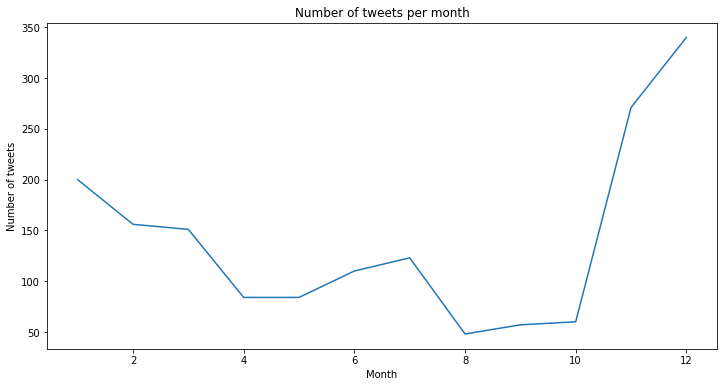

In [72]:
plt.figure(figsize=(12,6))
ax= df_final.groupby(df_final.index.month).count()['tweet_id'].plot()
ax.set_xlabel("Month")
ax.set_ylabel("Number of tweets")
plt.title('Number of tweets per month');

### Question & Insight 2: Number of tweets per hour

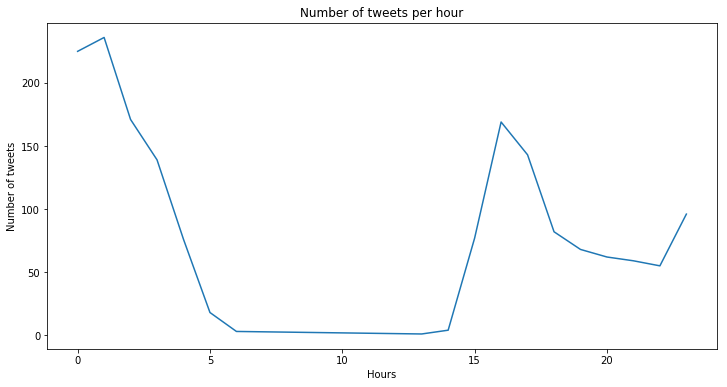

In [73]:
plt.figure(figsize=(12,6))
ax= df_final.groupby(df_final.index.hour).count()['tweet_id'].plot()
ax.set_xlabel("Hours")
ax.set_ylabel("Number of tweets")
plt.title('Number of tweets per hour');
plt.show()

### Question & Insight 3: Most popular breeds

Text(0.5,1,'Top 10 breeds')

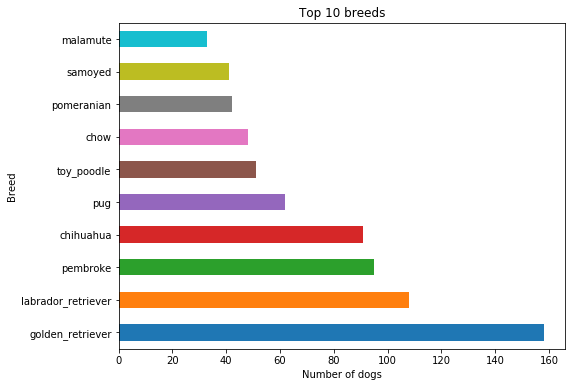

In [74]:
plt.figure(figsize=(8,6))
ax = df_final.groupby('p_breed').size().sort_values(ascending=False)[:10].plot.barh()
ax.set_xlabel("Number of dogs")
ax.set_ylabel("Breed")
plt.title('Top 10 breeds')

### Question & Insight 4: Most retweeted breed 

Text(0.5,1,'Top 10 retweeted breeds')

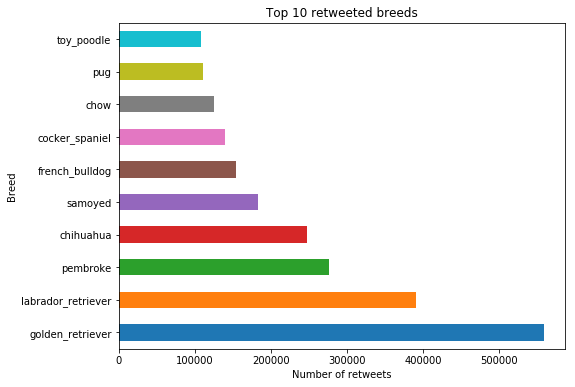

In [75]:
plt.figure(figsize=(8,6))
ax = df_final.groupby(['p_breed'])['retweet_count'].sum().sort_values(ascending=False)[:10].plot.barh()
ax.set_xlabel("Number of retweets")
ax.set_ylabel("Breed")
plt.title("Top 10 retweeted breeds")

### Question & Insight 5: Most favorited breed 

Text(0.5,1,'Top 10 favorited breeds')

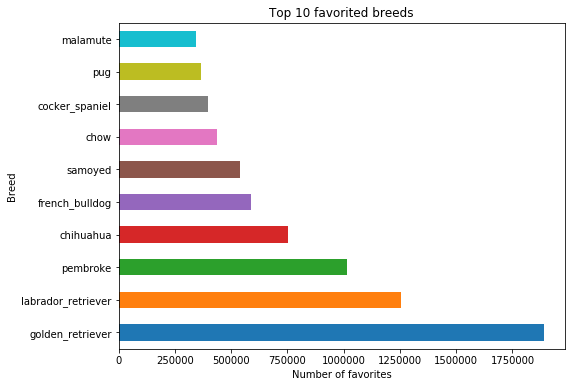

In [76]:
plt.figure(figsize=(8,6))
ax = df_final.groupby(['p_breed'])['favorite_count'].sum().sort_values(ascending=False)[:10].plot.barh()
ax.set_xlabel("Number of favorites")
ax.set_ylabel("Breed")
plt.title("Top 10 favorited breeds")

### Question & Insight 6: Correlation betweet retweeted and favorited tweets  

In [77]:
df_final.groupby('p_breed')['retweet_count','favorite_count'].sum().corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.995936
favorite_count,0.995936,1.000000


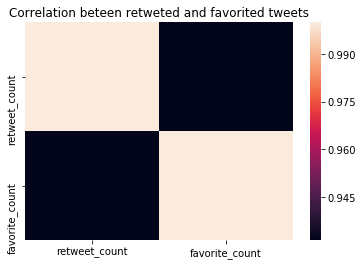

In [78]:
import seaborn as sns
corr = df_final[['retweet_count','favorite_count']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);
plt.title("Correlation beteen retweted and favorited tweets");